<a href="https://colab.research.google.com/github/dickyadem/NLP-Using-LSTM/blob/main/NLP_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/all-data.csv',
                 encoding='ISO-8859-1')

In [ ]:

df= df[['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .','neutral']]
df.rename({'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'text','neutral':'labels'},axis=1,inplace=True)


In [ ]:
df.head()

,text,labels
0,Technopolis plans to develop in stages an area...,neutral
1,The international electronic industry company ...,negative
2,With the new production plant the company woul...,positive
3,According to the company 's updated strategy f...,positive
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive


In [ ]:
category = pd.get_dummies(df.labels)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='labels')
df_baru

,text,negative,neutral,positive
0,Technopolis plans to develop in stages an area...,0,1,0
1,The international electronic industry company ...,1,0,0
2,With the new production plant the company woul...,0,0,1
3,According to the company 's updated strategy f...,0,0,1
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0,0,1
...,...,...,...,...
4840,LONDON MarketWatch -- Share prices ended lower...,1,0,0
4841,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0,1,0
4842,Operating profit fell to EUR 35.4 mn from EUR ...,1,0,0
4843,Net sales of the Paper segment decreased to EU...,1,0,0


In [ ]:
kalimat = df_baru['text'].values
label = df_baru[['negative',	'neutral',	'positive']].values

In [ ]:
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=7490, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=75490, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

opt =keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)
model.compile(loss='categorical_crossentropy',optimizer=opt ,metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9997):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), batch_size=64, verbose=2, callbacks=[callbacks])

Epoch 1/50
61/61 - 13s - loss: 0.9527 - accuracy: 0.5939 - val_loss: 0.8726 - val_accuracy: 0.5934 - 13s/epoch - 205ms/step
Epoch 2/50
61/61 - 7s - loss: 0.8127 - accuracy: 0.6305 - val_loss: 0.7516 - val_accuracy: 0.6770 - 7s/epoch - 113ms/step
Epoch 3/50
61/61 - 6s - loss: 0.6711 - accuracy: 0.7036 - val_loss: 0.7143 - val_accuracy: 0.6894 - 6s/epoch - 98ms/step
Epoch 4/50
61/61 - 4s - loss: 0.5314 - accuracy: 0.7681 - val_loss: 0.7327 - val_accuracy: 0.6894 - 4s/epoch - 61ms/step
Epoch 5/50
61/61 - 3s - loss: 0.4396 - accuracy: 0.8065 - val_loss: 0.8718 - val_accuracy: 0.6987 - 3s/epoch - 56ms/step
Epoch 6/50
61/61 - 3s - loss: 0.3759 - accuracy: 0.8287 - val_loss: 0.9850 - val_accuracy: 0.7069 - 3s/epoch - 57ms/step
Epoch 7/50
61/61 - 3s - loss: 0.3373 - accuracy: 0.8395 - val_loss: 0.9836 - val_accuracy: 0.6605 - 3s/epoch - 56ms/step
Epoch 8/50
61/61 - 3s - loss: 0.3041 - accuracy: 0.8542 - val_loss: 1.0770 - val_accuracy: 0.6780 - 3s/epoch - 56ms/step
Epoch 9/50
61/61 - 3s - loss

In [ ]:
model.evaluate(padded_latih, label_latih)

122/122 [==============================] - 1s 12ms/step - loss: 7.5840e-04 - accuracy: 0.9997


[0.000758397625759244, 0.9997420310974121]

In [ ]:
model.evaluate(padded_test, label_test)

31/31 [==============================] - 0s 10ms/step - loss: 2.6322 - accuracy: 0.7461


[2.6322379112243652, 0.7461300492286682]

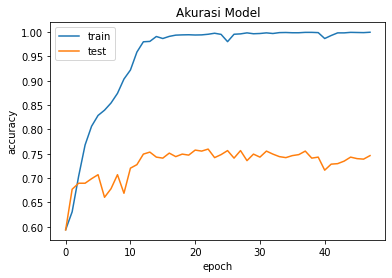

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

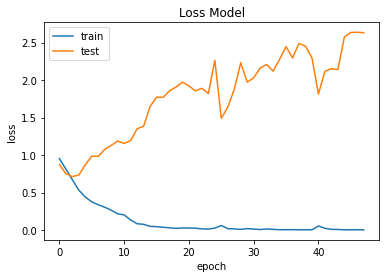

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()